In [1]:
using Plots # пусть грузится, пока читаем теорию
# plotlyjs() # интерактивные графики

#  Нелинейное уравнение Шредингера

http://eqworld.ipmnet.ru/ru/solutions/npde/npde-toc1.htm

Нелинейное **уравнение Шредингера** (читается как «Шрёдингера», в русскоязычной литературе используется сокращение *НУШ*) имеет вид

$$
iw_t + \alpha w_{xx} + \beta w|w|^2 = 0
$$

Здесь $w = w(x, t)$ есть комплекснозначная функция двух вещественных аргументов, $\alpha$
и $\beta$ – постоянные вещественные параметры. В математической физике уравнение стало широко известно в последние полвека. Оно является модельным уравнением для нелинейных процессов и применяется в различных областях физики, например, в нелинейной оптике и физике плазмы.

Нам необходимо рассмотреть задачу Коши для *НУШ*. Прежде всего запишем уравнение для вещественной и мнимой частей неизвестной функции, записав $w = u + iv$.
Далее будем записывать все промежуточные расчеты для удобства их проверки. Подставляем $w$ в уравнение

$$
i(u_t + iv_t) + \alpha(u_{xx} + iv_{xx}) + \beta(u + iv)(u^2 + v^2) = 0
$$

$$
u_t + \alpha v_{xx} + \beta v(u^2 + v^2) = 0 \\
v_t - \alpha u_{xx} - \beta u(u^2 + v^2) = 0
$$

Данная система позволяет решить *НУШ* не используя комплексные вычисления. *FORTRAN, Julia, Matlab, Scilab* поддерживают работу с комплексными числами, поэтому будем решать *НУШ* в стандартном виде:

$$
\left\{\begin{matrix}
i\partial_tu + \alpha\partial_x^2u = \beta|u|^2u \\ 
u(x,t_0) = f(x)
\end{matrix}\right.
$$

# Разностные схемы

[Источник](https://pandia.ru/text/80/654/68519.php)

К дифференциальным уравнениям с частными производными приходим при решении самых разнообразных задач. Например, при помощи дифференциальных уравнений с частными производными можно решать задачи теплопроводности, диффузии, многих физических и химических процессов. 

Как правило, найти точное решение этих уравнений не удается, поэтому наиболее широкое применение получили приближенные методы их решения. В данной работе ограничимся рассмотрением дифференциальных уравнений с частными производными второго порядка, а точнее дифференциальными уравнениями с частными производными второго порядка параболического типа, когда
эти уравнения являются линейными, а искомая функция зависит от двух переменных

Для решения дифференциальных уравнений параболического типа существует несколько методов их численного решения на ЭВМ, однако особое положение занимает *метод сеток*, так как он обеспечивает наилучшие соотношения скорости, точности полученного решения и простоты реализации вычислительного алгоритма. Метод сеток еще называют *методом конечных разностей*.


## Схема Кранка-Николсона

**Явная конечно разностная схема**, записанная в форме

$$
u_j^{k+1} = \sigma u^k_{j+1} + (1-2\sigma)u^k_j + \sigma u^k_{j-1}\\
\sigma = \frac{a^2\tau}{h^2}
$$

обладает тем достоинством, что решение на верхнем временном слое $t^{k+1}$ получается сразу (без решения *СЛАУ*) по значениям сеточной функции на нижнем временном слое $t^k$, где решение известно (при $k = 0$ значения сеточной функции формируются из начального условия). Но эта же схема обладает существенным недостатком, поскольку она является условно устойчивой.

С другой стороны, **неявная конечно-разностная схема**, записанная форме

$$
-a_ju^{k+1}_{j-1} + b_ju^{k+1}_j - c_ju^{k+1}_{j+1} = d_j
$$

приводит к необходимости решать *СЛАУ*, но зато эта схема абсолютно устойчива. 

[Примеры решения задач с использованием явной и неявной КРС](https://habr.com/ru/post/429218/)

в соответствии с явной схемой, разностное решение будет заниженным по сравнению с точным,
так как $u^{k+1}_j$ определяется по меньшим значениям сеточной функции на предыдущем временном слое, поскольку решение является возрастающим по времени.
Для неявной схемы на возрастающем решении, наоборот, решение завышено по сравнению с точным, поскольку оно определяется по значениям сеточной функции на верхнем временном слое.
На убывающем решении картина изменяется противоположным образом: явная конечно-разностная схема завышает решения, а неявная — занижает.



На основе этого анализа возникла идея о построении более точной неявно-явной конечно-разностной схемы с весами при пространственных конечноразностных операторах, причем при измельчении шагов тик точное (неизвестное) решение может быть взято в «вилку» сколь угодно узкую, так как если явная и неявная схемы аппроксимируют дифференциальную задачу и эти схемы
устойчивы, то при стремлении сеточных характеристик $\tau$ и $h$ к нулю решения по явной и неявной схемам стремятся к точному решению с разных сторон.

Рассмотрим неявно-явную схему с весами для простейшего уравнения теплопроводности: 

$$
\frac{u_j^{k+1} - u^k_j}{\tau} = \sigma a^2\frac{u_{j+1}^{k+1}-2u_{j}^{k+1}+u_{j-1}^{k+1}}{h^2} + (1-\sigma) a^2\frac{u_{j+1}^{k} - 2u_{j}^{k} + u_{j-1}^{k}}{h^2}
$$

где $\sigma$ - вес неявной части конечно-разностной схемы, $1-\sigma$ - вес для явной части.

Причем $0<\sigma<1$. При $\sigma = 1$ имеем полностью неявную схему, при $\sigma=0$ – полностью явную схему, а при $\sigma = 1/2$ – схему **Кранка-Николсона**

Составим конечноразностную схему для уравнения Шрёдингера:

$$
\mathrm{i}u_t + \alpha u_{xx} + \beta u|u|^2 = 0
$$

$$
\mathrm{i}\frac{U^{k+1}_{j}-U^{k}_{j}}{dt}+\alpha\sigma\frac{U^{k+1}_{j-1}-2U^{k+1}_{j}+U^{k+1}_{j+1}}{dx^2}+
\alpha(1-\sigma)\frac{U^{k}_{j-1}-2U^{k}_{j}+U^{k}_{j+1}}{dx^2}+(1-\delta)\beta|U^{k}_{j}|^2U^{k+1}_{j} + \delta\beta|U^{k}_{j}|^2U^{k}_{j} = 0
$$

Чтоб контролировать нелинейное слагаемое, вводим параметр $\delta$, что позволит управлять вкладом в расчетную схему текущего и следующего временных слоев ( $|U^{k}_{j}|^2U^{k}_{j}$ и $|U^{k}_{j}|^2U^{k+1}_{j}$ ). Далее приводим систему к трехдиагональнуму виду:

$$
U^{k+1}_{j-1}+(\frac{\mathrm{i}dx^2}{\alpha\sigma dt}-2 + (1-\delta)\frac{\beta dx^2}{\alpha\sigma}|U^{k}_{j}|^2)U^{k+1}_{j} + U^{k+1}_{j+1} = (1-1/\sigma)U^{k}_{j-1} + (\frac{\mathrm{i}dx^2}{\alpha\sigma dt}+2(1/\sigma-1) - \frac{\delta\beta dx^2}{\alpha\sigma}|U^{k}_{j}|^2)U^{k+1}_{j} + (1-1/\sigma)U^{k}_{j+1}
$$

Полученная СЛАУ решается **методом прогонки**:

$$
a_ju^{k+1}_{j-1} - b_ju^{k+1}_j + c_ju^{k+1}_{j+1} = d_j
$$

$a_1=0$, $c_n=0$, $\xi_2 = \frac{c_1}{b_1}$, $\eta_2 = -\frac{d_1}{b_1}$

$
\xi_{j+1} = \frac{c_j}{b_j-a_j\xi_j}, j = 2:n+1
$

$
\eta_{j+1} = \frac{a_j\eta_j-d_j}{b_j-a_j\xi_j}, j=2:n
$

$\xi_{n+1} = 0$, $u_n = \eta_{n+1}$ 

$u_j = \xi_{j+1}u_{j+1}+\eta_{j+1}$, $j = n:1$

условие сходимости:

$|b_j|\geqslant |a_j|+|c_j|$

Задачу решим для различных начальных условий:

#### Синус

$f(x) = \sin(x)$, $\lambda = -2$

#### Би-солитон

$f(x) = 4e^{\mathrm{i}t}\frac{(1+2\mathrm{i}t)\cosh(x)-x\sinh(x)}{1+2x^2+8t^2+\cosh(2x)}$

#### Солитон

$f(x) = A\sqrt(\frac{2}{\beta})\frac{\exp(\mathrm{i}(B(x-x_0)+C_1))}{\cosh(A(x-x_0)+C_2)}$

## Схема Дюфорта-Франкела

[Пример](https://docviewer.yandex.ru/view/326904132/?*=i052gRxykuKa0kvGXaXIt1UQcjF7InVybCI6Imh0dHBzOi8vcmVwb3NpdG9yeS51cC5hYy56YS9iaXRzdHJlYW0vaGFuZGxlLzIyNjMvMjg2NTgvZGlzc2VydGF0aW9uLnBkZj9zZXF1ZW5jZT0xIiwidGl0bGUiOiJkaXNzZXJ0YXRpb24ucGRmP3NlcXVlbmNlPTEiLCJ1aWQiOiIzMjY5MDQxMzIiLCJ5dSI6IjI0ODIxNzM5MDE1NTIwNDg4ODciLCJub2lmcmFtZSI6dHJ1ZSwidHMiOjE1NTYwNDI2ODk2MjksInNlcnBQYXJhbXMiOiJsYW5nPWVuJnRtPTE1NTYwNDI1NjYmdGxkPXJ1Jm5hbWU9ZGlzc2VydGF0aW9uLnBkZiUzRnNlcXVlbmNlJTNEMSZ0ZXh0PUR1K0ZvcnQtRnJhbmtlbCt0eXBlK21ldGhvZCZ1cmw9aHR0cHMlM0EvL3JlcG9zaXRvcnkudXAuYWMuemEvYml0c3RyZWFtL2hhbmRsZS8yMjYzLzI4NjU4L2Rpc3NlcnRhdGlvbi5wZGYlM0ZzZXF1ZW5jZSUzRDEmbHI9MzgmbWltZT1wZGYmbDEwbj1ydSZzaWduPTgwY2RhZmE3YTNhODg2MTIzYjFkYTllOWY4YTc4ZTQ4JmtleW5vPTAifQ%3D%3D&page=42&lang=en)

Lixin Wu, Dufort–frankel-type methods for linear and nonlinear schrödinger equations, SIAM J. Numer.
Anal. 33 (1996), no. 4, 1526–1533.



Данная трехуровневая явная схема, сходящаяся при $dx/dt\rightarrow 0$, сводит *НУШ* к следующей задаче:

$$
\mathrm{i}\frac{U^{k+1}_{j}-U^{k-1}_{j}}{2\tau} = -\frac{U^{k}_{j+1}-U^{k+1}_{j}-U^{k-1}_{j}+U^{k}_{j-1}}{dx^2} -\beta|U^{k}_{j}|^2\frac{U^{k+1}_{j}+U^{k-1}_{j}}{2}
$$

$$
U^{k+1}_{j} = [U^{k-1}_{j}(1-\mathrm{i}(r-\tau\beta|U^{k}_{j}|^2))+\mathrm{i}r(U^{k}_{j+1}+U^{k}_{j-1})] * (1+\mathrm{i}(r-\tau\beta|U^{k}_{j}|^2))^{-1}
$$

$r = 2\tau/dx^2$

Первые два слоя решаем Крэнком-Николсоном (та же прогонка), а затем, запоминая предыдущие два слоя, проходим по оставшимся.

Для дифференциальных операторов используется аппроксимация:

$$
\frac{\partial u}{\partial t} \approx \frac{1}{2dt}\left( u^{k+1}_j - u^{k-1}_j \right)
$$

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{1}{dx^2}\left( u^k_{j+1} - (u^{k+1}_j + u^{k-1}_j) + u^k_{j-1} \right)
$$

## Релаксационная схема Бессе

[Источник](https://www.math.univ-toulouse.fr/~cbesse/en/publication/b-sinum-2004/)

 Ключевая идея метода состоит в замене, позволяющей избежать необходимости решения нелинейных уравнений:
 
 $$
 \left\{\begin{matrix}
v = |u|^2\\ 
\mathrm{i}\partial_tu + \partial_x^2u = - \beta vu
\end{matrix}\right.
 $$
 
$u(x,0) = f(x)$, $t^{k+1} = t^k+\frac{1}{2}\tau$, $r = \frac{\tau}{2dx^2}$
 
  $$
 \left\{\begin{matrix}
V^{k+\frac{1}{2}}_j = -V_j^{k-\frac{1}{2}} + 2|U_{j}^{k}|^2 \\ 
U_{j-1}^{k+1} + (\frac{\mathrm{i}}{r} - 2 - \beta dx^2V^{k+\frac{1}{2}}_j )U_{j}^{k+1} + U_{j+1}^{k+1} = -U_{j-1}^{k} + 
(\frac{\mathrm{i}}{r} + 2 + \beta dx^2V^{k+\frac{1}{2}}_j)U_{j}^{k} - U_{j+1}^{k}
\end{matrix}\right.
 $$

Так же решаем прогонкой, но теперь схема выглядит проще.

In [48]:
function soliton( x; β = 2, x0=3., AA=2.0, BB=1.0, C1=0.0, C2=0.0 )
	AA*sqrt(2.0/β)*exp(im*(BB*(x-x0)+C1)) /
        	cosh(AA*(x-x0)+C2)
end

bisoliton(x) = ( cosh(x)-x*sinh(x) ) / ( 1 + 2x^2 + cosh(2x) )

bisoliton (generic function with 1 method)

In [27]:
function schredinger(startcond;
	num = 1, # 1 - KN, 2 - DF, 3 - RB
    L = 10.0, # длина нити
    Lt = 5.0, # верхний порог по времени
    N::Int64 = 5000, # шагов по координате
    M::Int64 = 20000, # по времени
    β = 2. , # коэффициент при нелинейном слагаемом
    α = 1. , # коэффициент при 2й пр-ной по коор-те
    σ = 1. , # управляем нелинейностью
    δ = 0.5 , # вклад схемы (Я, НЯ, КН)
    λ = 0.1, # параметр Куранта
    x0 = 0.0)

    cutn::Int64 = N÷100 # целочисленное деление
    cutm::Int64 = M÷100 # для графиков только каждый 100й шаг
    ξ = zeros(Complex, N)
    η = zeros(Complex, N)
    V = zeros(Complex, N)
    U = zeros(Complex, N÷cutn, M÷cutm)

    dx = L/(N-1)
    dt = Lt/(M-1)
    #dt = λ*dx

    X = [0:N-1;]*dx .+ x0 # coords
	coordgrid = X[cutn:cutn:N] # разметки для графиков
	timesgrid = [cutm*dt:cutm*dt:M*dt;]

    println("dt = ", dt, " dx = ", dx, " dt/dx = ", dt/dx)

    V .= startcond.(X)

	function compression(v::Array{Complex,1}, k)
		if mod(k, cutm) == 0
            for i = 1:N  
                if mod(i, cutn) == 0
                    U[i÷cutn,k÷cutm] = v[i]
                end
            end
            print("$(k÷cutm) ") 
        end
	end

    function progonka!(v::Array{Complex,1})

        b = 2.0 - im*dx^2/(dt*α*σ) - (1.0-δ)*dx^2*β*abs2(v[2])/(α*σ)
        d = (σ-1.0)/σ*(v[1]+v[3]) + v[2]*( im*dx^2/(dt*σ*α) +  
                2.0*(1.0-σ)/σ - δ*dx^2/(α*σ)*β*abs2(v[2]) )

        ξ[3] = 1.0/b
        η[3] = -d/b

        @inbounds for i = 3:N-2
            b = 2.0 - im*dx^2/(dt*α*σ) - (1.0-δ)*dx^2*β*abs2(v[i])/(α*σ)
            d = (σ-1.0)/σ*(v[i-1] + v[i+1])+v[i]*( im*dx^2/(dt*σ*α) + 
                2.0*(1.0-σ)/σ - δ*dx^2/(α*σ)*β*abs2(v[i]) )

            ξ[i+1] = 1.0 / (b-ξ[i])
            η[i+1] = (η[i]-d) / (b-ξ[i])
        end

        b = 2.0 - im*dx^2/(dt*α*σ) - (1.0-δ)*dx^2*β*abs2(v[N-1])/(α*σ)
        d = (σ-1)/σ*(v[N-2]+v[N]) + v[N-1]*( im*dx^2/(dt*σ*α) + 
            2*(1-σ)/σ - δ*dx^2/(α*σ)*β*abs2(v[N-1]) )

        η[N] = (η[N-1]-d)/(b-ξ[N-1])
        v[N-1] = η[N]

        @inbounds for i = 2:N-2
            v[N-i] = ξ[N-i+1]*v[N-i+1] + η[N-i+1]
        end
    end
    
    function kranknickolson!(v::Array{Complex,1})
    	for k = 1:M
	        progonka!(v)
	        #v[1] = 0.0   #!граничное условие на левой границе     
	        #v[N] = 0.0   #!граничное условие на правой границе 
	# на выход отправляем каждый сотый шаг
	        compression(v, k) 
	    end
    end

    function dufortfrankel!( v::Array{Complex,1} )

    	v0 = zeros(Complex, N)
    	v1 = copy(v) 

		function caterpillar()
			v0 .= v1 # перекладывание слоев
			v1 .= v
		end
# второй слой прогонкой (Кранк-Николсон)
		progonka!(v)
		caterpillar()

	    for k = 2:M
            
		    @inbounds for i = 2:N-1
		        v[i] = ( v0[i]*(1. - im*( 2*dt/dx^2 - dt*β*abs2(v1[i])) ) + im*2*dt/dx^2 * 
		        (v1[i+1]+v1[i-1]) ) / ( 1. + im*(2dt/dx^2 - dt*β*abs2(v1[i]) ) )
		    end

			caterpillar()
	        #v[1] = 0.0 # гранусл  
	        #v[N] = 0.0  
	        compression(v, k) 
	    end
	end
    
	function besserelaxation!( v::Array{Complex,1} )

		vv = zeros(Complex, N)

        function Besse!( v::Array{Complex,1} )

            @inbounds for i = 2:N-1
                vv[i] = -vv[i] + 2*abs2(v[i])
            end

            b = -2.0*im*dx^2/(dt*α*σ) + 2.0 - β*dx^2*vv[2]
            d = - v[1] + (2.0*im*dx^2/(dt*α*σ) + 2.0 - β*dx^2*vv[2] )*v[2] - v[3]

            ξ[3] = 1.0/b
            η[3] = -d/b

            @inbounds for i=3:N-2
                b = -2.0*im*dx^2/(dt*α*σ) + 2.0 - β*dx^2*vv[i]
                d = -v[i-1] + (2.0*im*dx^2/(dt*α*σ) + 2.0 - β*dx^2*vv[i] )*v[i] - v[i+1]

                ξ[i+1] = 1.0 / ( b-ξ[i] )
                η[i+1] = ( η[i] - d ) / ( b - ξ[i] )
            end

            if(abs(b) < 2.)
               println("b = ", b)
            end

            b = -2.0*im*dx^2/(dt*α*σ) + 2.0 - β*dx^2*vv[N-1]
            d = - v[N-2] + (2.0*im*dx^2/(dt*α*σ) + 2.0 - β*dx^2*vv[N-1] )*v[N-1] - v[N]

            η[N] = ( η[N-1] - d ) / ( b - ξ[N-1] )
            v[N-1] = η[N]

            @inbounds for i=2:N-2
                v[N-i] = ξ[N-i+1]*v[N-i+1] + η[N-i+1]
            end
        end
        
		for k = 1:M

	        Besse!(v) 
             #v[1] = 0.0 # гранусл     
             #v[N] = 0.0    
            #vv[1] = 0.0        
            #vv[N] = 0.0 
	        compression(v, k)
	    end
	end

	method_of = [ kranknickolson!, dufortfrankel!, besserelaxation! ]
    
    method_of[num](V)

    real(U), coordgrid, timesgrid
end

schredinger (generic function with 1 method)

In [49]:
#@time S, R, T = schredinger(sin, num = 2, N = 5000, M = 20000, L = 2π );
#@time S, R, T = schredinger(bisoliton, num = 2, N = 5000, M = 20000, L = 8π, x0 = -4π );
@time S, R, T = schredinger(soliton, num = 3, N = 5000, M = 20000, L = 10, Lt =10, x0 = 0.0 );

dt = 0.0005000250012500625 dx = 0.002000400080016003 dt/dx = 0.24996249812490626
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 120.108163 seconds (2.86 G allocations: 73.875 GiB, 21.16% gc time)


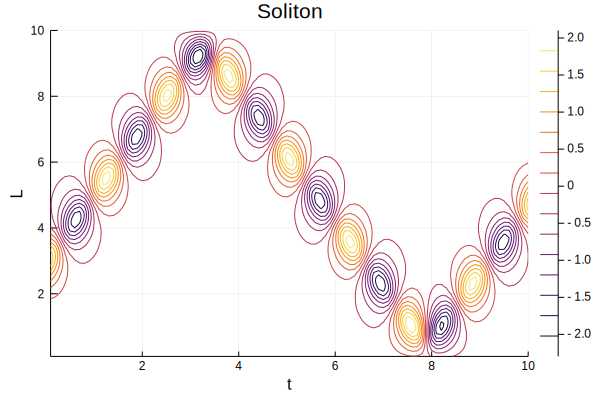

In [50]:
contour(T, R, S, xaxis = "t", yaxis = "L", title = "Soliton")

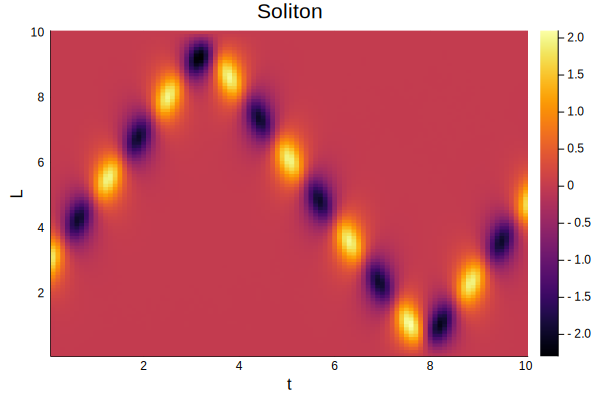

In [51]:
heatmap(T, R, S, xaxis = "t", yaxis = "L", title = "Soliton")

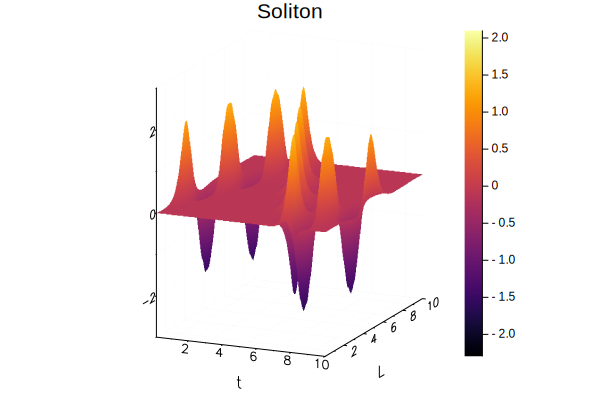

In [52]:
surface(T, R, S, xaxis = "t", yaxis = "L", title = "Soliton")

In [39]:
cd("C:\\Users\\User\\Desktop\\Mycop") # путь сохранения картинок

In [40]:
using DelimitedFiles

In [53]:
# сохранить в файлы
open("results.txt", "w") do io
           writedlm(io, S)
       end

open("grids.txt", "w") do io2
           writedlm(io2, [T R] )
       end

In [44]:
# считать из файлов
S = readdlm("results.txt", '\t', Float64, '\n')
TR = readdlm( "grids.txt", '\t', Float64, '\n')
T = TR[:,1]
R = TR[:,2];

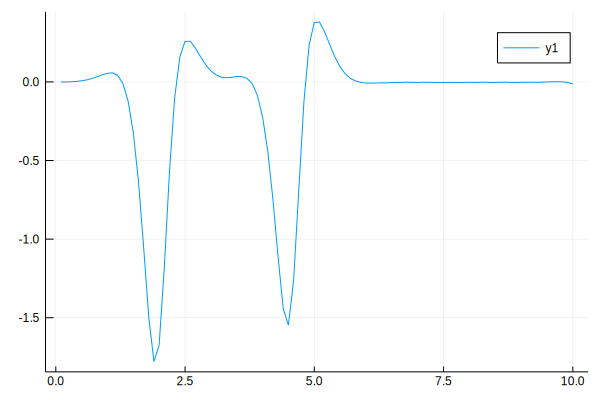

In [96]:
plot(R, S[70,:]) # смотрим поведение конкретной точки

Динамика солитона (колебания нити с течением времени)

![gif](images/soliton.gif)

Динамика каждой точки отдельно (фиксируем точку и смотрим на ее смещения с течением времени)

![fix_X](images/fix_x.gif)

Преобразование Фурье

![fft](images/fft.gif)

БПФ для фиксированных точек

![fft_fix_x](images/fft_x.gif)

In [81]:
# сохраняем все кадры, а потом их в гифку или видео
for i = 1:100
    p = plot(T, S[i,:], line = 4, lab = "", yaxis=( (-2.5, 2.5), -2.5:0.5:2.5), title = "X = $(round(R[i], digits = 4))" )
    savefig(p, "soliton_xfix$i.png")
end

In [ ]:
for i = 1:100
    p = fftn(R, S[i,:], 50, 80)
    savefig(p, "fft_xfix$i.png")
end

In [ ]:
run(`ffmpeg -framerate 1 -f image2 -i soliton_xfix%d.png gifka2.gif`)